# Data Science Project: Individual Planning Stage

### Anya Jones  
### 86102779  

### Data Description:

A UBC research group is collecting data on how people play videogames. Below is a summary of the datasets:

##### Sessions Data: sessions.csv

Observations(rows):1535  
Variables(columns):5

##### Variable Information:
|Variable Name| Type    | Description|
|------------|----------|--------|
|hashedEmail |Character |Player's unique hashed anonymous email (same as players.csv)|
|start_time  |Character |Game session start time for player (human-readable)|
|end_time    |Character |Game session end time for player (human-readable)|
|original_start_time|Double |Original session start time (server time stamp)| 
|original_end_time|Double |Original session end time (server time stamp)|

##### Additional Details:
- Start/end times are in a date time format and must be aggregated to allow for session durations to be computed.
- Inconsistencies due to time zone variations.
- Sessions may include missing, inconsistent or outlying data.
- Potential errors(mismatched/incorrect) in email inputs.
  
##### Player Data: players.csv

Observations(rows): 196  
Variables(columns): 7

##### Variable Information:
|Variable Name| Type    | Description|
|------------|----------|--------|
|experience  |Character |Player's self reported experience level(from amateur to veteran)|
|subscribe   |Logical   |Whether the player subscribed to a game-related newsletter (True/False)|
|hashedEmail |Character |Player's unique hashed anonymous email|
|played_hours|Double    |Player's total hours in the game|
|name        |Character |Players in game name|
|gender      |Character |Player self reported gender| 
|age         |Double    |Player age in years (no decimals)|

##### Additional Details:
- Experience level is self reported and may be biased resulting in inaccurate representation. 
- Sampling bias may affect results (may not represent general population).
- Self reported variables may be biased. 
- Missing values may be present affecting analysis.
- Age and played_hours may have outliers causing the results to be skewed.


### Questions:  
##### Broad question:  
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

##### Specific question:  
Can a players total playtime(played_hours), experience level (experience), number of sessions (number_of_sessions), and mean session length (mean_session_length_mins) predict whether they will subscribe to the game-related newsletter (subscribe)?  

These predictor variables will help address the question as they reveal key behaviors of the players and their potential connection to the probability of players subscribing. I will need to compute the number of sessions and their mean duration from the sessions dataset then combine it with the players data to get the required variables.

### Exploratory Data Analysis:

In [1]:
# Loading necessaiy libraries.
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(repr)
library(lubridate)
library(readr)

#limiting dataframe outputs to 6 rows.
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Load the Data.
players<- read_csv(
        "https://raw.githubusercontent.com/ajones200/dsci100_individual/refs/heads/main/players.csv") 
players

sessions<- read_csv(
        "https://raw.githubusercontent.com/ajones200/dsci100_individual/refs/heads/main/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
#View Players Dataset information.
cat("Players Dataset:\n","Rows:", nrow(players),"\n","Columns:", ncol(players))
cat("\n")
cat("\nPlayers Dataset Variable types:\n")
sapply(players, typeof)

#Check number of missing/NA variables.
cat("\nPlayers dataset missing variables:\n") 
    print(colSums(is.na(players)))

#Look at all unique outcomes for the quatitative variables with limited results (gender and experience).
#These are self assigned variables.
cat("Possible unique outcomes for the catagorical variables\n")
players|>
select(experience, gender)|>
map(unique)

Players Dataset:
 Rows: 196 
 Columns: 7

Players Dataset Variable types:


experience    subscribe  hashedEmail played_hours         name       gender 
 "character"    "logical"  "character"     "double"  "character"  "character" 
         Age 
    "double"


Players dataset missing variables:
  experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2 
Possible unique outcomes for the catagorical variables


$experience
[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

$gender
[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

In [4]:
#View Sessions dataset information.
cat("Sessions Dataset:\n","Rows:", nrow(sessions),"\n","Columns:", ncol(sessions))
cat("\n")
cat("\nSessions Dataset Variable types:\n")
sapply(sessions, typeof)

#Check number of missing variables.
cat("\nSessions Dataset missing Variables:\n") 
    print(colSums(is.na(sessions)))

Sessions Dataset:
 Rows: 1535 
 Columns: 5

Sessions Dataset Variable types:


hashedEmail          start_time            end_time original_start_time 
        "character"         "character"         "character"            "double" 
  original_end_time 
           "double"


Sessions Dataset missing Variables:
        hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2 


In [11]:
#Calculate the mean of each quantitative variable from the players dataset.
cat("Mean of Quantitative Variables in Players Dataset:\n")

numeric_players<- players[sapply(players, is.numeric)]

players_mean<-colMeans(numeric_players, na.rm= TRUE)
    
mean_table<- tibble(
                 Variable = names(players_mean),
                 Mean = (players_mean))
                        
mean_table

Mean of Quantitative Variables in Players Dataset:


Variable,Mean
<chr>,<dbl>
played_hours,5.845918
Age,21.139175


In [6]:
#Data Wrangling.
#Remove NA values from the datasets.
players_clean<- drop_na(players)
sessions_clean<- drop_na(sessions)

#convert start and end times (character strings) to an object that can be used to compute the duration of each session in minutes.
sessions_time_mutate<- sessions_clean|>
    mutate(
        start= dmy_hm(start_time, tz = "UTC"), 
        end= dmy_hm(end_time, tz = "UTC"),
        duration_mins = as.numeric(difftime(end, start, units= "mins")))
#When wanting to use the mean session length for computation may want to convert to hours, standardize or change the hours_played to minutes.

#calculate mean session time and number of sessions.
sessions_organized<- sessions_time_mutate|>
    group_by(hashedEmail)|>
    summarize(
        number_of_sessions = n(),
        mean_session_length_mins = mean (duration_mins, na.rm=TRUE),
        )
sessions_organized #view new data table.

hashedEmail,number_of_sessions,mean_session_length_mins
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,53
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,30
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,11
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,15.46774
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,9.00000
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,72.00000


In [7]:
# Merge the datasets.
players_merged<- players_clean|>
    left_join(sessions_organized, by = "hashedEmail")|>
    filter(!is.na(number_of_sessions), !is.na(mean_session_length_mins))
#Remove any NA values(players who had no sessions or time played).

#Select only needed columns for final dataset.
#Include mean_session_length, played_hours, number_of_sessions, experience.
players_final_data<- players_merged|>
select(mean_session_length_mins, played_hours, number_of_sessions, experience, subscribe)
players_final_data 

mean_session_length_mins,played_hours,number_of_sessions,experience,subscribe
<dbl>,<dbl>,<int>,<chr>,<lgl>
74.77778,30.3,27,Pro,TRUE
85.00000,3.8,3,Veteran,TRUE
5.00000,0.0,1,Veteran,FALSE
⋮,⋮,⋮,⋮,⋮
21.00000,0.3,1,Veteran,FALSE
5.00000,0.0,1,Amateur,FALSE
29.83333,2.3,6,Amateur,FALSE


### Visualizations

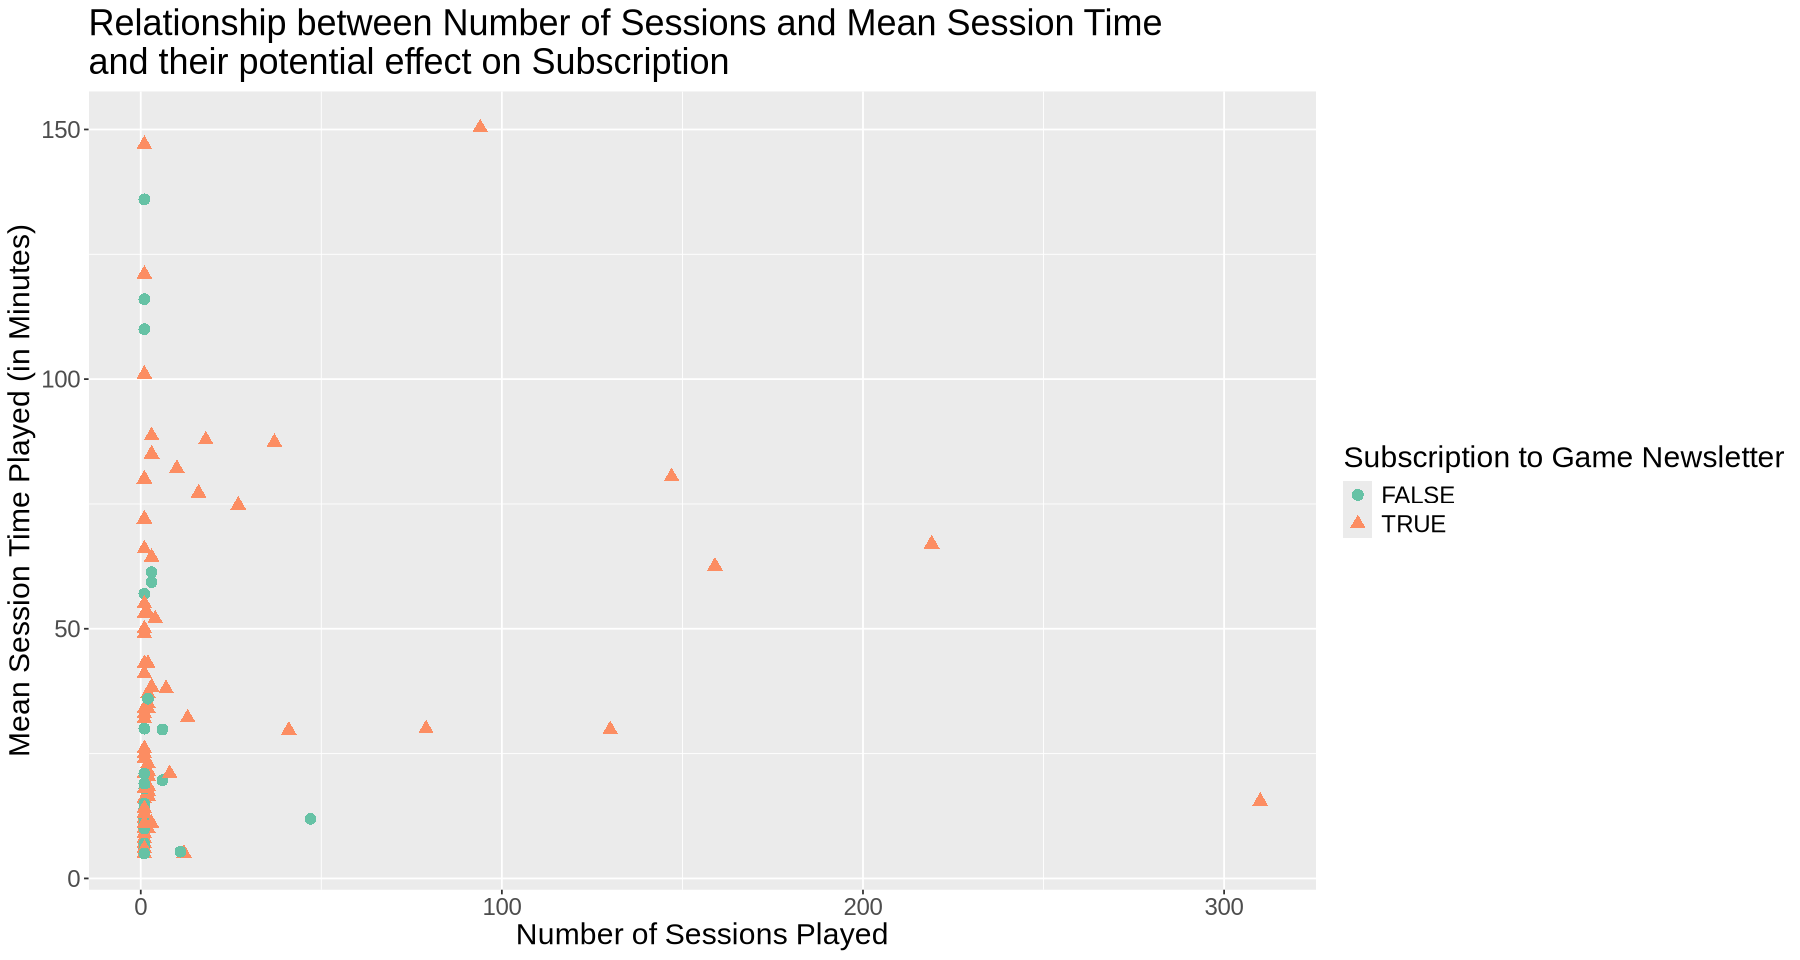

In [8]:
#Scatterplot showing the relationships between the number of sessions, mean session time and subscription. 
options(repr.plot.width = 15, repr.plot.height = 8)
sessions_info_plot<- players_final_data|>
ggplot(aes(x= number_of_sessions, y= mean_session_length_mins, color= subscribe, shape=subscribe))+
    geom_point(size=3)+ 
    labs(x= "Number of Sessions Played", 
         y= "Mean Session Time Played (in Minutes)", 
         title = "Relationship between Number of Sessions and Mean Session Time \nand their potential effect on Subscription",
         color="Subscription to Game Newsletter",
         shape="Subscription to Game Newsletter")+
    scale_color_brewer(palette = "Set2")+
    theme(text = element_text(size = 18))

sessions_info_plot

Most players have short sessions and play infrequently. There are very few players with more than 100 sessions played and they have shorter session times and appear less likely to subscribe. There is no discernable relationships dictating subscription for players with less sessions. 

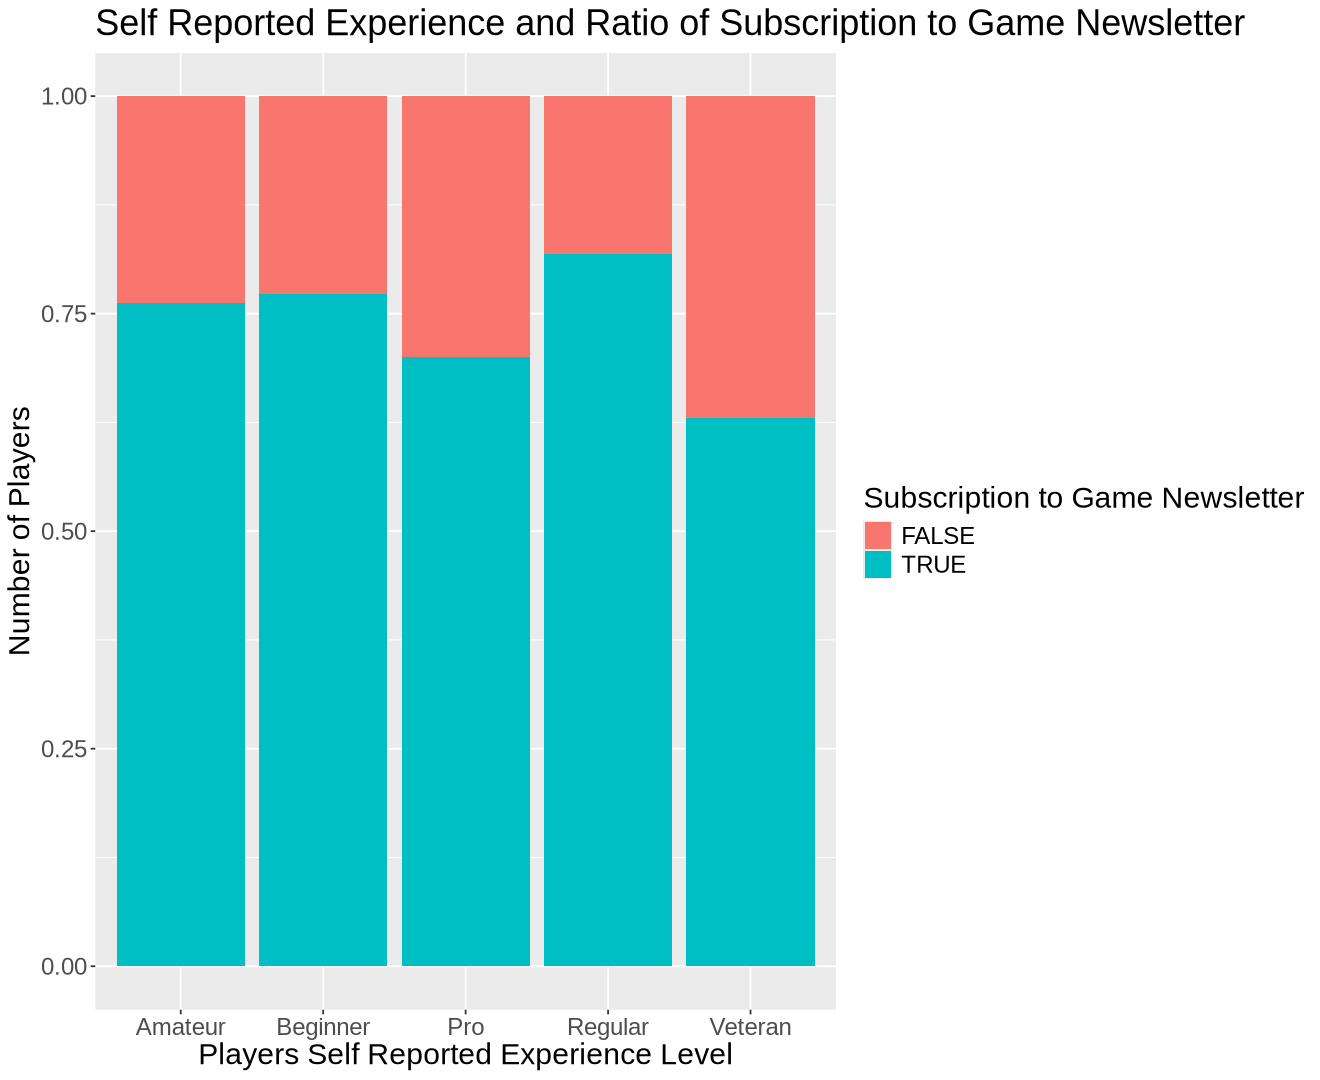

In [12]:
#Bar graph of the ratio of subscriptions between self reported experience levels.
options(repr.plot.width = 11, repr.plot.height = 9)
experience_plot<- players_final_data|>
    ggplot(aes(x=experience, fill= subscribe))+
    geom_bar(position="fill")+
    labs(x="Players Self Reported Experience Level",
         y="Number of Players",
        title="Self Reported Experience and Ratio of Subscription to Game Newsletter",
        fill = "Subscription to Game Newsletter")+
    theme(text = element_text(size = 18))
experience_plot

All experience levels have subscribers. The veteran and pro catagories have the largest proportion of non subscribed players and the amateur, beginner and regular players have higher subscription proportions suggesting that newer/less experienced players are more likely to subscribe. 

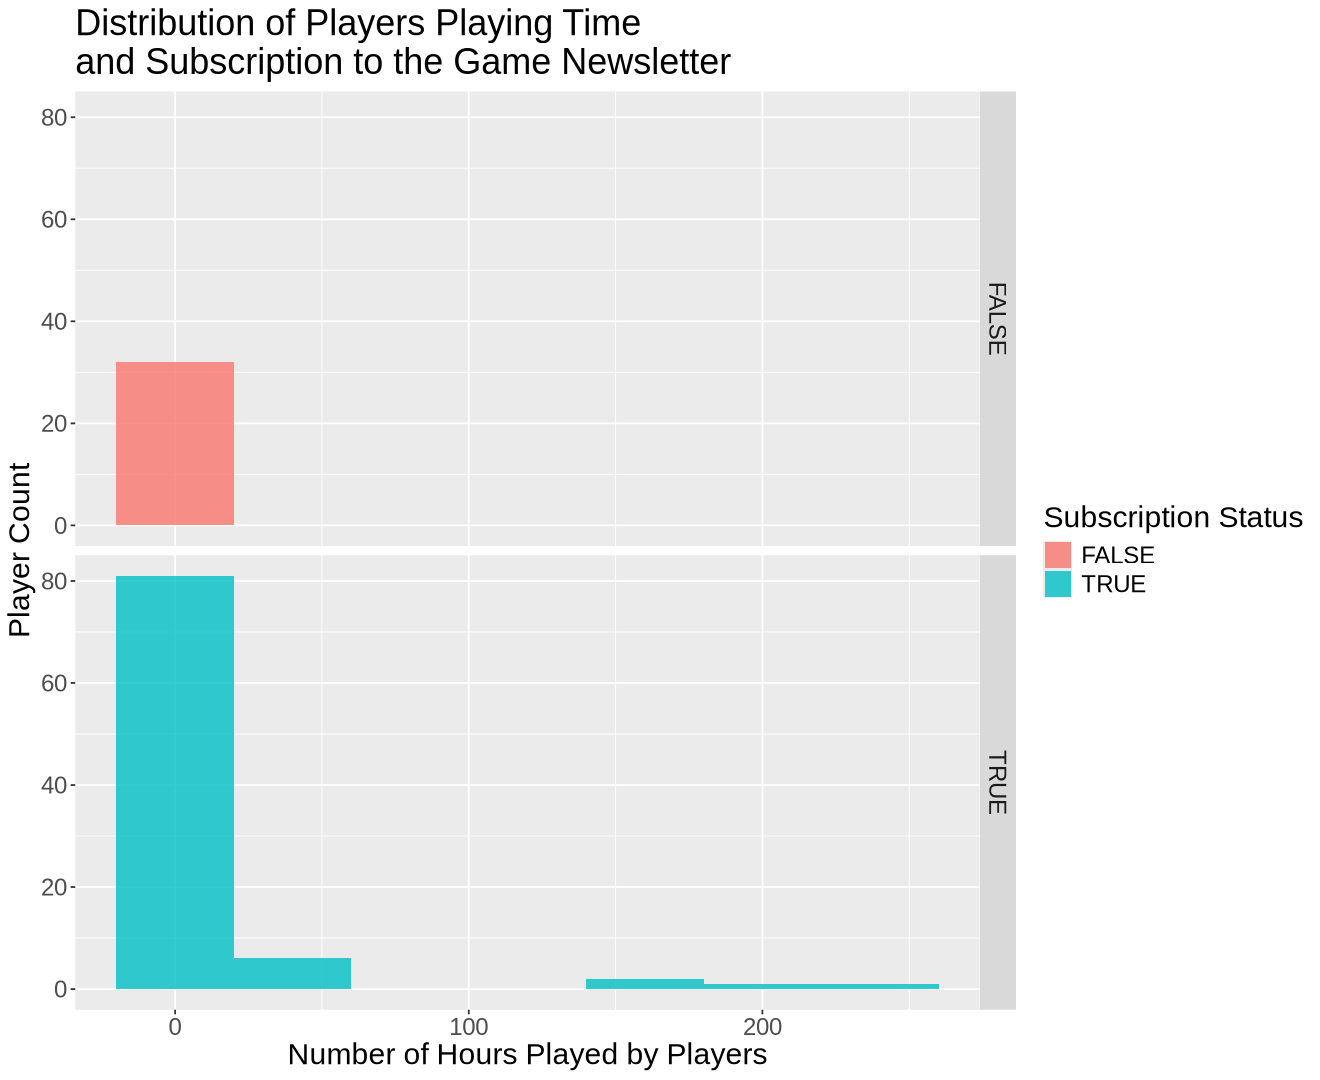

In [10]:
#Histogram showing the players time spent playing and the subscriptions to the game-related newsletter.  
options(repr.plot.width = 11, repr.plot.height = 9)
player_time_plot<- players_final_data|>
    ggplot(aes(x= played_hours, fill= as_factor(subscribe)))+
    geom_histogram(binwidth= 40, alpha = 0.8)+
    facet_grid(rows = vars(subscribe)) +
    labs(x="Number of Hours Played by Players",
         y="Player Count",
        title= "Distribution of Players Playing Time\nand Subscription to the Game Newsletter",
        fill="Subscription Status")+
    theme(text = element_text(size = 18))
player_time_plot

There is a large number of players with short play times and then there are a few outliers who have have large play times suggesting an imbalenced distribution. Players with more time spent playing are more likely to subscribe. 

### Methods and Plan

Proposed method: K Nearest Neighbours Classification:

#### Why this method is appropriate:

The goal of this project is to predict whether a player will subscribe to a game related newsletter, which is a binary classification problem with two outcomes, true or false. KNN classification works based on the majority class of the chosen number of nearest datapoints (K). It can adapt well to new data and can work with multiple predictor variables without assuming connections between the data.

#### Assumptions if there are any:
- The data once scaled should stop bias in the classifications. 
- There is no missing data. 
- Players with closely related data(experience, play time, etc.) are similar and will follow similar subscription patterns.

#### Limitations of this model:
- KNN classification model can be sensitive to noise, imbalanced data (must scale data) and outliers.
- Can overfit or underfit data depending on value of k. 
- Can be slow for large datasets.
  
#### Comparing and Selecting Model:
- Cross validation (10 folds) and analysis of accuracy will be used on the training data to choose the best value for k.
- The final model will be run on the testing data and will be analyzed using accuracy, precision, recall and a confusion matrix.

#### Processing Data to apply to the model:

1. Split data into a training(70%) and testing(30%) set using intitial_split function.
2. Preprocess data:
   - Standardize the numeric data to ensure unbiased predictions.
   - Change all categorical variables to factors using as_factor.
   - Set the seed.
3. Use cross validation with 10 folds as this is a smaller dataset(less bias) on the training data to tune the model. This will prevent overfitting and ensure the model will work well with the unseen data later.
  - Train the classifier using workflow and tune_grid() using values of k from 1 to 20 by 1. 
  - Predict the labels within each fold and calculate accuracy for each K value. Use this to choose best value of K. 
4. Assess the model on the unseen testing dataset using accuracy, precision, recall and a confusion matrix. 

#### Repository Link  

https://github.com/ajones200/dsci100_individual.git